In [1]:
import os, shutil,shutil, random
import tensorflow as tf
import matplotlib.pyplot as plt
import csv
import math
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import applications
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dropout, Flatten, Dense, Input, GlobalAveragePooling2D
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.applications.vgg16 import preprocess_input

In [2]:
# Set the path to your image dataset
data_path = "your folder"

# Define the parameters for the ImageDataGenerator
batch_size = 1
img_height = 400
img_width = 400
validation_split = 0.2

# Use the ImageDataGenerator to load and preprocess the images
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=validation_split
)

train_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    class_mode='categorical',
    subset='validation'
)

# Split the data into training and testing sets
x_train, y_train = train_generator.next()
x_test, y_test = validation_generator.next()

Found 320 images belonging to 8 classes.
Found 80 images belonging to 8 classes.


In [3]:
image_size = 400
input_shape = (image_size, image_size, 3)
batch_size = 1

model = applications.VGG16(input_shape=input_shape, include_top=False, weights='imagenet')

x = GlobalAveragePooling2D()(model.output)
x=Dense(1000)(x)
x = Dense(256, activation='relu', kernel_initializer='glorot_normal')(x)
x = Dense(8, activation='softmax', name='output', kernel_initializer='glorot_normal')(x)

# add new classifier model on top of convolutional base
new_model = Model(model.input, x)

for layer in new_model.layers[:13]:
    layer.trainable = False
new_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 400, 400, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 400, 400, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 400, 400, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 200, 200, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 200, 200, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 200, 200, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 100, 100, 128)     0     

In [4]:
## Model compile and history check
new_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.0001),
    loss='categorical_crossentropy',
    metrics = ['accuracy'])

es = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
    mode='min',
    restore_best_weights=True, 
    verbose=1,
    patience=5)

C:\Users\mrche\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [5]:
checkpoint = ModelCheckpoint('deepPolyNetUV.hdf5', monitor='val_acc', verbose=1, save_best_only=True, mode='max')

# fine-tune the model
history = new_model.fit_generator(
    train_generator,
    epochs=100,
    validation_data=validation_generator,
    callbacks=[checkpoint])
new_model.save('deepPolyNetUV.hdf5')

Epoch 1/100


C:\Users\mrche\AppData\Local\Temp\ipykernel_21716\2494535653.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = new_model.fit_generator(


320/320 [==============================] - 129s 400ms/step - loss: 1.4823 - accuracy: 0.4187 - val_loss: 0.7321 - val_accuracy: 0.6625
Epoch 2/100
320/320 [==============================] - 126s 393ms/step - loss: 0.4963 - accuracy: 0.8313 - val_loss: 0.6540 - val_accuracy: 0.7500
Epoch 3/100
320/320 [==============================] - 132s 413ms/step - loss: 0.4244 - accuracy: 0.8813 - val_loss: 0.6154 - val_accuracy: 0.8000
Epoch 4/100
320/320 [==============================] - 127s 398ms/step - loss: 0.2906 - accuracy: 0.9187 - val_loss: 0.9726 - val_accuracy: 0.7375
Epoch 5/100
320/320 [==============================] - 133s 417ms/step - loss: 0.2776 - accuracy: 0.9187 - val_loss: 0.4391 - val_accuracy: 0.8250
Epoch 6/100
320/320 [==============================] - 133s 416ms/step - loss: 0.2390 - accuracy: 0.9344 - val_loss: 0.5204 - val_accuracy: 0.8000
Epoch 7/100
320/320 [==============================] - 132s 412ms/step - loss: 0.0482 - accuracy: 0.9906 - val_loss: 1.0952 - val_

320/320 [==============================] - 120s 375ms/step - loss: 7.5623e-08 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9875
Epoch 28/100
320/320 [==============================] - 120s 376ms/step - loss: 5.6252e-08 - accuracy: 1.0000 - val_loss: 0.0608 - val_accuracy: 0.9875
Epoch 29/100
320/320 [==============================] - 121s 377ms/step - loss: 4.4703e-08 - accuracy: 1.0000 - val_loss: 0.0595 - val_accuracy: 0.9875
Epoch 30/100
320/320 [==============================] - 120s 376ms/step - loss: 3.4273e-08 - accuracy: 1.0000 - val_loss: 0.0609 - val_accuracy: 0.9875
Epoch 31/100
320/320 [==============================] - 120s 376ms/step - loss: 2.8685e-08 - accuracy: 1.0000 - val_loss: 0.0591 - val_accuracy: 0.9875
Epoch 32/100
320/320 [==============================] - 121s 378ms/step - loss: 2.1607e-08 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9875
Epoch 33/100
320/320 [==============================] - 120s 376ms/step - loss: 1.8626e-08 - accuracy

Epoch 53/100
320/320 [==============================] - 120s 376ms/step - loss: 7.4506e-10 - accuracy: 1.0000 - val_loss: 0.0532 - val_accuracy: 0.9875
Epoch 54/100
320/320 [==============================] - 121s 380ms/step - loss: 1.1176e-09 - accuracy: 1.0000 - val_loss: 0.0424 - val_accuracy: 0.9875
Epoch 55/100
320/320 [==============================] - 121s 377ms/step - loss: 7.4506e-10 - accuracy: 1.0000 - val_loss: 0.0420 - val_accuracy: 0.9875
Epoch 56/100
320/320 [==============================] - 120s 376ms/step - loss: 7.4506e-10 - accuracy: 1.0000 - val_loss: 0.0501 - val_accuracy: 0.9875
Epoch 57/100
320/320 [==============================] - 120s 376ms/step - loss: 3.7253e-10 - accuracy: 1.0000 - val_loss: 0.0438 - val_accuracy: 0.9875
Epoch 58/100
320/320 [==============================] - 121s 377ms/step - loss: 3.7253e-10 - accuracy: 1.0000 - val_loss: 0.0486 - val_accuracy: 0.9875
Epoch 59/100
320/320 [==============================] - 120s 375ms/step - loss: 3.7253e-

Epoch 79/100
320/320 [==============================] - 120s 376ms/step - loss: 1.3704e-05 - accuracy: 1.0000 - val_loss: 0.0596 - val_accuracy: 0.9875
Epoch 80/100
320/320 [==============================] - 121s 377ms/step - loss: 7.7271e-06 - accuracy: 1.0000 - val_loss: 0.0556 - val_accuracy: 0.9875
Epoch 81/100
320/320 [==============================] - 120s 376ms/step - loss: 5.3760e-06 - accuracy: 1.0000 - val_loss: 0.0559 - val_accuracy: 0.9875
Epoch 82/100
320/320 [==============================] - 121s 378ms/step - loss: 3.2096e-06 - accuracy: 1.0000 - val_loss: 0.0514 - val_accuracy: 0.9875
Epoch 83/100
320/320 [==============================] - 121s 377ms/step - loss: 2.3476e-06 - accuracy: 1.0000 - val_loss: 0.0632 - val_accuracy: 0.9875
Epoch 84/100
320/320 [==============================] - 120s 377ms/step - loss: 1.8615e-06 - accuracy: 1.0000 - val_loss: 0.0623 - val_accuracy: 0.9875
Epoch 85/100
320/320 [==============================] - 121s 377ms/step - loss: 9.9464e-

In [6]:
## learning curve function define
def plot_accuracy_and_loss(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.show()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
    plt.show()

<Figure size 921.6x691.2 with 0 Axes>

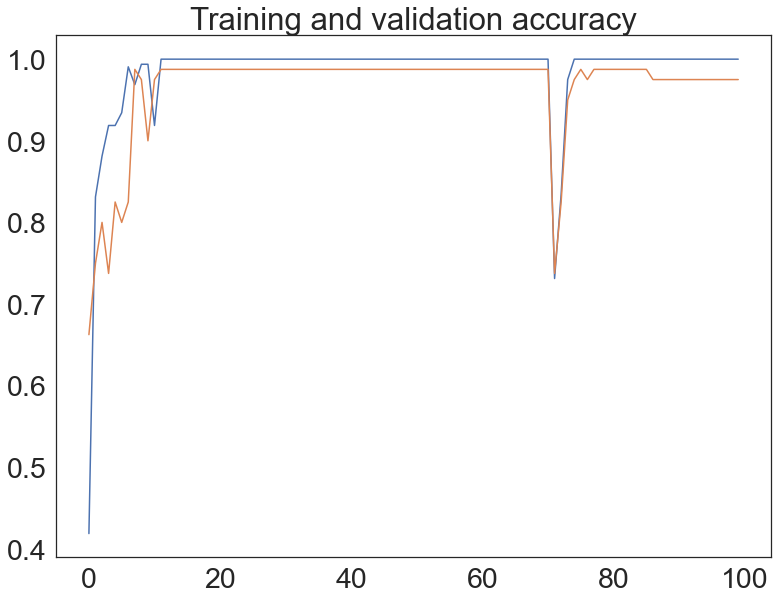

<Figure size 921.6x691.2 with 0 Axes>

In [7]:
import seaborn as sns

sns.set(rc={'figure.figsize':(12.8,9.6)})
sns.set(font_scale=2.6,style="white")
acc = history.history['accuracy']
val_acc = history.history[ 'val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs   = range(len(acc)) 
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
plt.figure()

Text(0.5, 1.0, 'Training and validation loss')

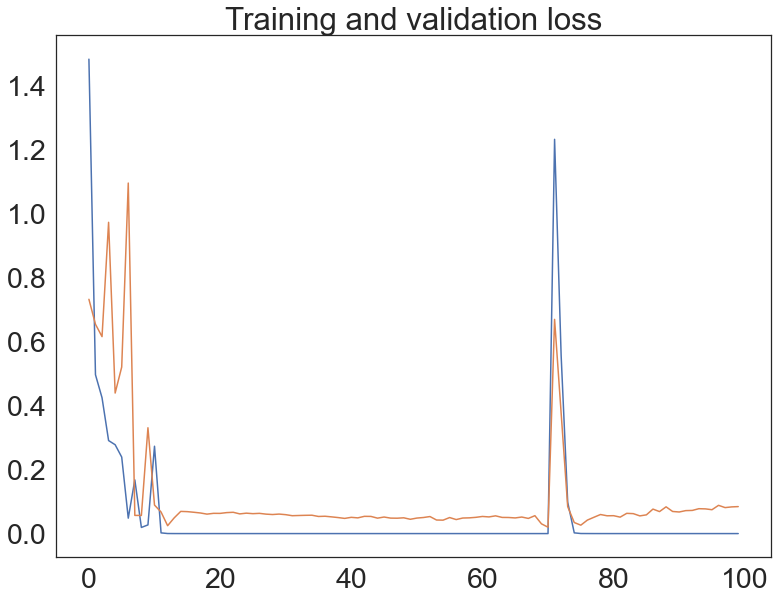

In [8]:
## Loss curve plot
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [9]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Y_pred = new_model.predict_generator(validation_generator)
y_pred = np.argmax(Y_pred, axis=1)

C:\Users\mrche\AppData\Local\Temp\ipykernel_21716\3330199934.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = new_model.predict_generator(validation_generator)


In [10]:
fnames = validation_generator.filenames ## fnames is all the filenames/samples used in testing
errors = np.where(Y_pred != validation_generator.classes)[0] ## misclassifications done on the test data where y_pred is the predicted values
for i in errors:
    print(fnames[i])

PMMA0\009.png


C:\Users\mrche\AppData\Local\Temp\ipykernel_21716\4045619818.py:2: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  errors = np.where(Y_pred != validation_generator.classes)[0] ## misclassifications done on the test data where y_pred is the predicted values


In [11]:
validation_generator.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix  #Required input to plot_confusion_matrix
import seaborn as sns

def plot_confusion_matrix(confusion_matrix, class_names, errors_only=False, figsize = (15,6), fontsize=16):
    """
    Plots confusion matrix as a color-encoded Seaborn heatmap.  Zeroes are
    colored white.  Normalized values that are zero when rounded to three
    decimals, Ex. 0.000, will be colored white.  Get more decicmals by
    updating fmt, for example to '0.4f', and updating get_text() value.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object sklearn.metrics.confusion_matrix. 
    class_names: list
        List of class names in the order they index the confusion matrix.
    figsize: tuple
        A pair tuple.  The first value is figure width.  The second
        value is figure height. Defaults to (15,6).
    fontsize: int
        Font size for axes labels. Defaults to 16.
    """        
    #Instantiate Figure
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    plt.subplots_adjust(wspace = 0.5)
    
    #Show errors only by filling diagonal with zeroes.
    if errors_only:
        np.fill_diagonal(confusion_matrix, 0)        
        
    # ax1 - Normalized Confusion Matrix    
    #Normalize by dividing (M X M) matrix by (M X 1) matrix.  (M X 1) is row totals.
    conf_matrix_norm = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:,np.newaxis]
    conf_matrix_norm = np.nan_to_num(conf_matrix_norm)  #fix any nans caused by zero row total
    df_cm_norm = pd.DataFrame(conf_matrix_norm, index=class_names, columns=class_names)
    heatmap = sns.heatmap(df_cm_norm, ax=ax1, cmap='Blues', fmt='.3f', annot=True, annot_kws={"size": fontsize},
              linewidths=2, linecolor='black', cbar=False)
    
    ax1.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax1.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix messed up ylim
    ax1.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax1.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax1.set_title('Confusion Matrix - Normalized', pad=15, fontsize=fontsize, color='black')
    
    # ax2 - Confusion Matrix - Class Counts
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names)    
    heatmap = sns.heatmap(df_cm, ax=ax2, cmap='Blues', fmt='d', annot=True, annot_kws={"size": fontsize+4},
              linewidths=2, linecolor='black', cbar=False)   
    
    ax2.tick_params(axis='x', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.tick_params(axis='y', labelrotation=0, labelsize=fontsize, labelcolor='black')
    ax2.set_ylim(ax1.get_xlim()[0], ax1.get_xlim()[1])  #Fix bug in matplotlib 3.1.1.  Or, use earlier matplotlib.
    ax2.set_xlabel('PREDICTED CLASS', fontsize=fontsize, color='black')
    ax2.set_ylabel('TRUE CLASS', fontsize=fontsize, color='black')
    ax2.set_title('Confusion Matrix - Class Counts', pad=15, fontsize=fontsize, color='black')    
  
    for text in ax1.texts:
        if text.get_text() == '0.000':
            text.set_color(color='white')            
    for text in ax2.texts:
        if text.get_text() == '0':
            text.set_color(color='white')

In [ ]:
class_labels = ['PS', 'PMMA','PS_PMMA1_3','PS_PMMA2_2','PS_PMMA3_1']
cm=confusion_matrix(validation_generator.classes, y_pred)

print('\n*** Sklearn confusion_matrix below.  It is challenging to understand. ***\n')
print(cm)
print('\nThe confusion_matrix labels are:', class_labels,  '\n...But, how do we read it?')

In [ ]:
#Visualize the confusion matrix using my function.  Both normalized and counts format.
#Class pairs are repeated in this format -- for example: (bird, cat) and (cat, bird).
#The redundant pair is ignored by hiding the zeroes with white text.

print('\n*** plot_confusion_matrix() function prints heatmaps with captions to improve readability! ***\n\n')
plot_confusion_matrix(confusion_matrix=cm, class_names=class_labels, errors_only=False, fontsize=10)